<a href="https://colab.research.google.com/github/aaronyu888/mat-494-notebooks/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression


---



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize

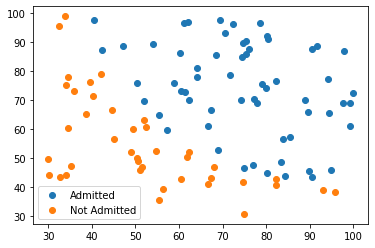

In [2]:
# data is from marks of 100 students for two exams and admittance
data = pd.read_csv("/content/drive/MyDrive/marks.txt", header = None);

# marks for both exams
X = data.iloc[:, :-1]

# admitted boolean values
y = data.iloc[:, -1]
admitted = data.loc[y == 1]
not_admitted = data.loc[y == 0]

plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], label = 'Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], label = 'Not Admitted')
plt.legend()
plt.show()

In [3]:
# sigmoid function
def sigmoid(x) :
  return 1 / (1 + np.exp(-x))

def net_input(theta, x):
  return np.dot(x, theta)

# probability of the output to be 1
def probability(theta, x):
  return sigmoid(net_input(theta, x))

# cost function
def cost_function(theta, x, y):
  m = x.shape[0]
  total_cost = -(1 / m) * np.sum(y * np.log(probability(theta, x)) + (1 - y) * np.log(1 - probability(theta, x)))
  return total_cost

# gradient 
def gradient(theta, x, y):
  m = x.shape[0]
  return (1 / m) * np.dot(x.T, sigmoid(net_input(theta, x)) - y)

def fit(x, y, theta):
  opt_weights = scipy.optimize.fmin_tnc(func = cost_function, x0 = theta, fprime = gradient, args = (x, y.flatten()))
  return opt_weights[0]

In [4]:
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))
parameters = fit(X, y, theta)
parameters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


array([-25.16131865,   0.20623159,   0.20147149])

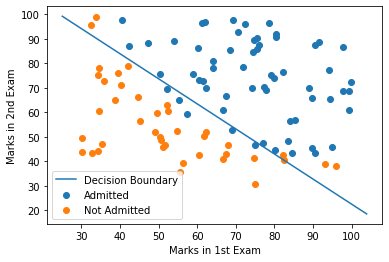

In [5]:
x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], label = 'Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], label = 'Not Admitted')
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()

In [6]:
def predict(x):
  theta = parameters[:, np.newaxis]
  return probability(theta, x)

def accuracy(x, actual_classes, threshold = 0.5):
  predicted_classes = (predict(x) >= threshold).astype(int)
  predicted_classes = predicted_classes.flatten()
  accuracy = np.mean(predicted_classes == actual_classes)
  return accuracy * 100

In [7]:
accuracy(X, y.flatten())

89.0